# Example Notebook for Downloading and Read in All SGP Lidar Data
This notebook provides a utility for downloading all lidar data from SGP for a given time range.

Author: Adam Theisen

## Import Libraries

In [1]:
import act
import glob
import json
import matplotlib.pyplot as plt
import numpy as np

## Download All Lidar Datasets
Note that this needs a file called token.json with your ARM username and token for the data API in the form of:
```
{
   "username": "ARM user name",
   "token":"ARM Token"
}
```
You can get your token by loging in [here](https://adc.arm.gov/armlive/).

In [2]:
#Read in ARM Live Data Webservice Token and Username
with open('./token.json') as f:
    data = json.load(f)
username = data['username']
token = data['token']

#Specify datastream and date range for data download
startdate = '2025-12-11'
enddate = '2025-12-11T23:59:59'

sdate = ''.join(startdate.split('-'))
edate = ''.join(enddate.split('-'))

datastream = 'sgpminimplC1.b1'
data_dir = './data/' + datastream
mini_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#mini_files = glob.glob('./data/sgpminimplC1.b1/*') # NOTE: This is here so once you download the files, you can easily just read them vs download again

datastream = 'sgpmplpolfsC1.b1'
data_dir = './data/' + datastream
mpl_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#mpl_files = glob.glob('./data/sgpmplpolfsC1.b1/*')

datastream = 'sgpceilpolC1.b1'
data_dir = './data/' + datastream
ceilpol_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#ceilpol_files = glob.glob('./data/sgpceilpolC1.b1/*' + sdate + '*')

datastream = 'sgpceil10mC1.b1'
data_dir = './data/' + datastream
ceil_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#ceil_files = glob.glob('./data/sgpceilC1.b1/*' + sdate + '*')

datastream = 'sgpdlfptC1.b1'
data_dir = './data/' + datastream
dl_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#dl_files = glob.glob('./data/sgpdlfptC1.b1/*' + sdate + '*')

datastream = 'sgpdlfptE13.b1'
data_dir = './data/' + datastream
dl_files_E13 = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#dl_files_E13 = glob.glob('./data/sgpdlfptE13.b1/*' + sdate + '*')

datastream = 'sgphsrlC1.a1'
data_dir = './data/' + datastream
hsrl_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate, output=data_dir)
#hsrl_files = glob.glob('./data/sgphsrlC1.a1/*' + sdate + '*')

[DOWNLOADING] sgpminimplC1.b1.20251211.000008.nc

If you use these data to prepare a publication, please cite:

Muradyan, P., Flynn, C., OBrien, J., & Ermold, B. Micropulse Lidar (MINIMPL),
2025-12-11 to 2025-12-11, Southern Great Plains (SGP), Central Facility, Lamont,
OK (C1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/2401652

[DOWNLOADING] sgpmplpolfsC1.b1.20251211.000005.nc

If you use these data to prepare a publication, please cite:

Muradyan, P., Cromwell, E., Koontz, A., Coulter, R., Flynn, C., Ermold, B., &
OBrien, J. Micropulse Lidar (MPLPOLFS), 2025-12-11 to 2025-12-11, Southern Great
Plains (SGP), Central Facility, Lamont, OK (C1). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1320657

No files returned or url status error.
Check datastream name, start, and end date. 

[DOWNLOADING] sgpceil10mC1.b1.20251211.000000.nc

If you use these data to prepare a publication, please cite:

Zhang, D., Morris, V., & E

## Read in data and apply corrections

In [13]:
# Read and Apply the MPL corrections
ds_mini = act.io.read_arm_netcdf(mini_files)
ds_mini = act.corrections.correct_mpl(ds_mini)

# Change coordinates to make the data easier to work with
ds_mini.coords['height'] = ds_mini.height
ds_mini = ds_mini.swap_dims({'range_bins': 'height'})

# Convert range to meters
ds_mini = ds_mini.utils.change_units('height', desired_unit='m')

In [4]:
# Read and Apply the MPL corrections
ds_mpl = act.io.read_arm_netcdf(mpl_files)
ds_mpl = act.corrections.correct_mpl(ds_mpl)

# Change coordinates to make the data easier to work with
ds_mpl.coords['height'] = ds_mpl.height
ds_mpl = ds_mpl.swap_dims({'range_bins': 'height'})

# Convert range to meters
ds_mpl = ds_mpl.utils.change_units('height', desired_unit='m')

In [6]:
# Read in CEILPOL Data
ds_ceilpol = act.io.read_arm_netcdf(ceilpol_files)
ds_ceilpol = act.corrections.correct_ceil(ds_ceilpol, var_name='backscatter_p_pol')

In [7]:
# Read in CEIL Data
ds_ceil = act.io.read_arm_netcdf(ceil_files)
ds_ceil = act.corrections.correct_ceil(ds_ceil)

In [8]:
# Read in DL data
ds_dlc1 = act.io.read_arm_netcdf(dl_files)
ds_dlc1 = act.corrections.correct_dl(ds_dlc1)

In [9]:
# Read in DL data
ds_dle13 = act.io.read_arm_netcdf(dl_files_E13)
ds_dle13 = act.corrections.correct_dl(ds_dle13)

In [10]:
# Read in DL data
ds_hsrl = act.io.read_arm_netcdf(hsrl_files)
hsrl_var = 'beta_a_backscatter'
ds_hsrl[hsrl_var].values = np.log10(ds_hsrl[hsrl_var].values)

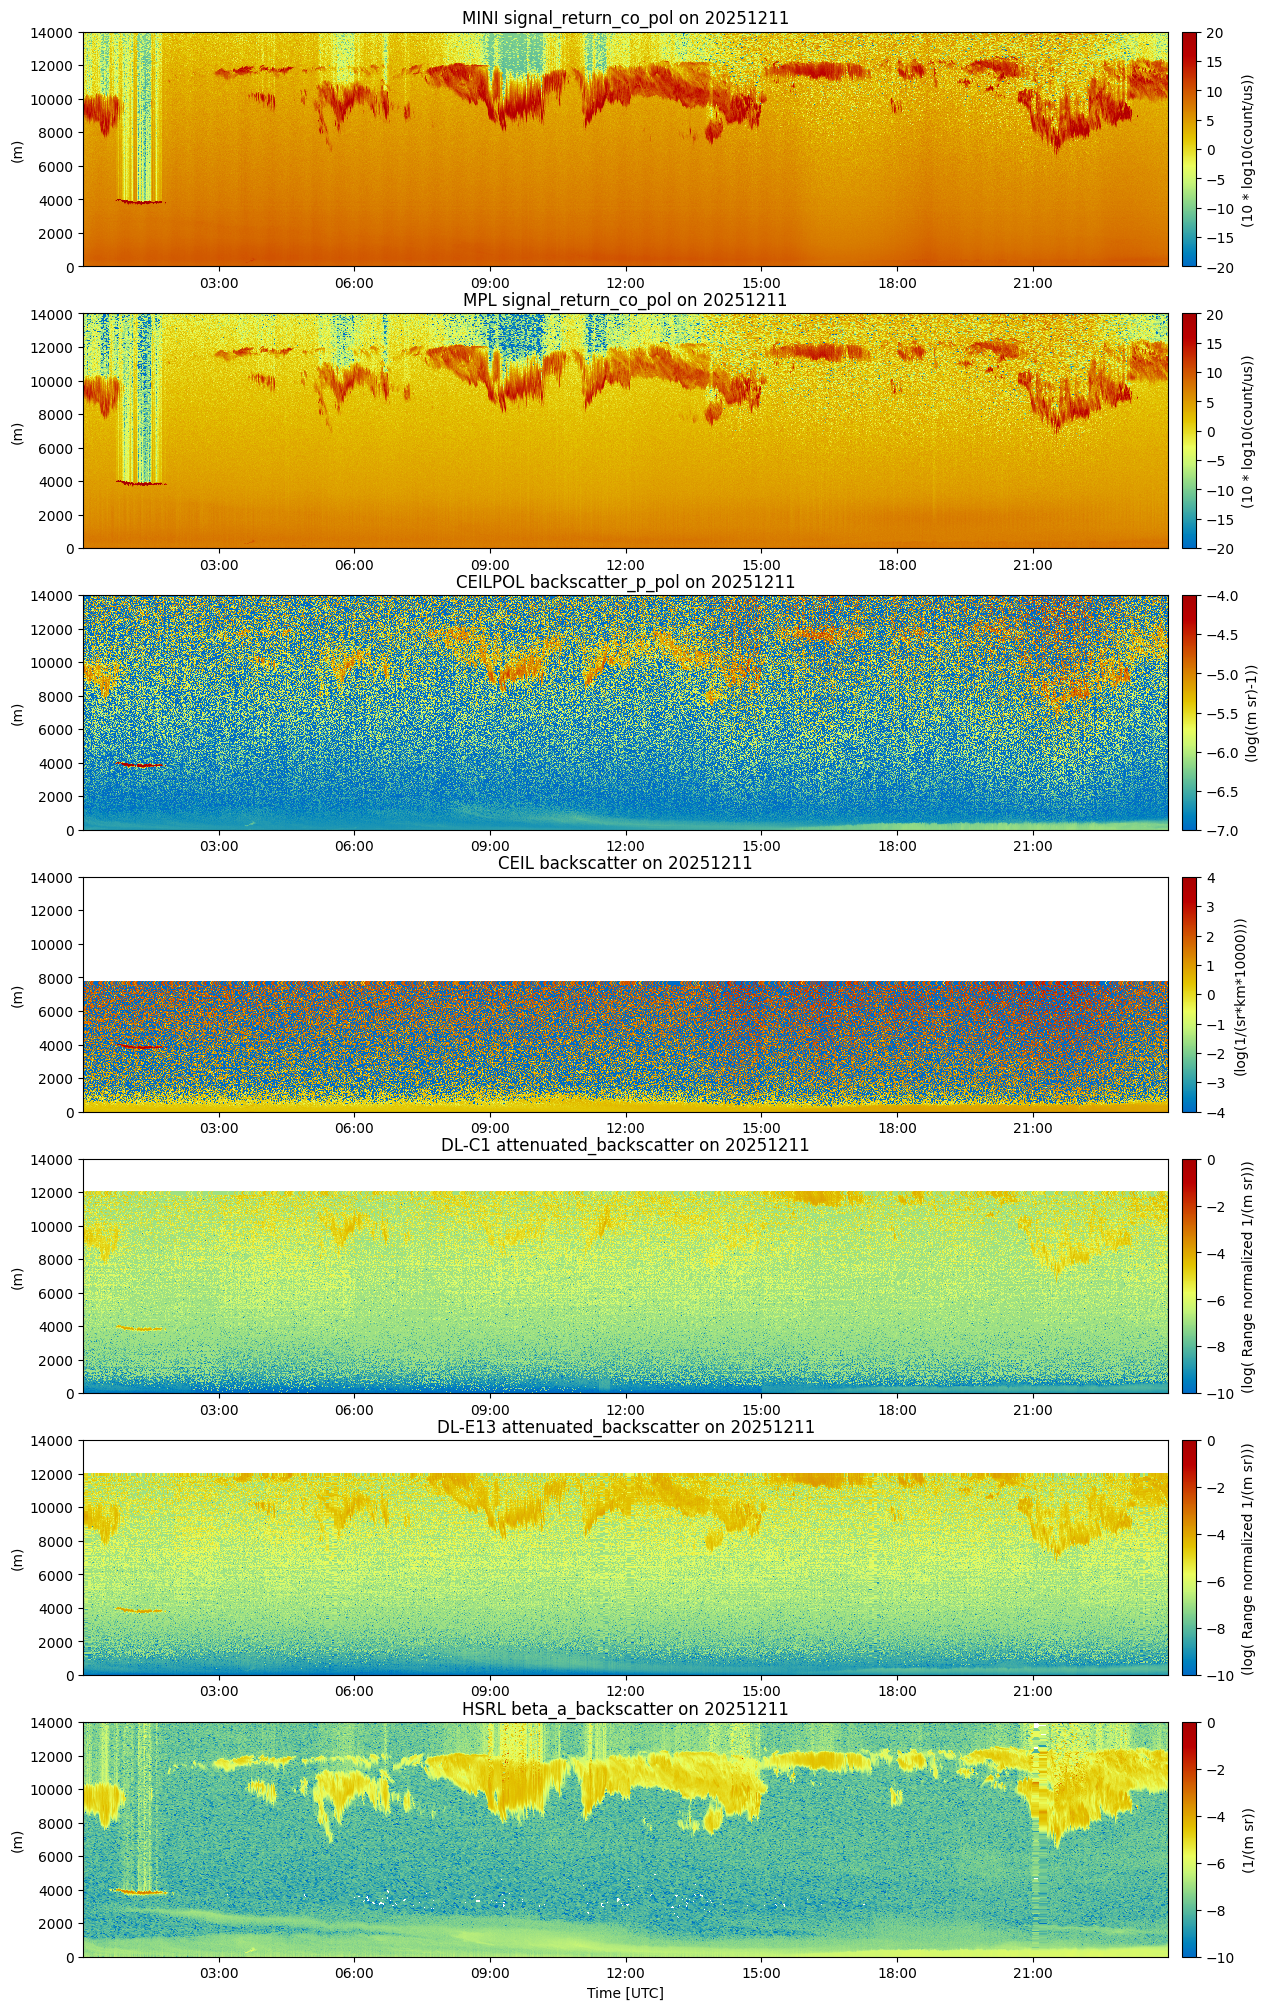

In [16]:
# Display data using the same y limits
yrng = [0, 14000]
display = act.plotting.TimeSeriesDisplay({'MINI': ds_mini, 'MPL': ds_mpl, 'CEILPOL': ds_ceilpol, 'CEIL':ds_ceil,
                                          'DL-C1':ds_dlc1, 'DL-E13': ds_dle13, 'HSRL': ds_hsrl},
                                         figsize=(14,25), subplot_shape=(7,))
display.plot('signal_return_co_pol', cvd_friendly=True, vmin=-20, vmax=20, dsname='MINI', subplot_index=(0,))
display.plot('signal_return_co_pol', cvd_friendly=True, vmin=-20, vmax=20, dsname='MPL', subplot_index=(1,))
display.plot('backscatter_p_pol', cvd_friendly=True, vmin=-7, vmax=-4, dsname='CEILPOL', subplot_index=(2,))
display.plot('backscatter', cvd_friendly=True, vmin=-4, vmax=4, dsname='CEIL', subplot_index=(3,))
display.plot('attenuated_backscatter', cvd_friendly=True, vmin=-10, vmax=0, dsname='DL-C1', subplot_index=(4,))
display.plot('attenuated_backscatter', cvd_friendly=True, vmin=-10, vmax=0, dsname='DL-E13', subplot_index=(5,))
display.plot(hsrl_var, cvd_friendly=True, vmin=-10, vmax=0, dsname='HSRL', subplot_index=(6,))

for ax in display.axes:
    ax.set_ylim(yrng)